# Теория вероятностей и математическая статистика
## Экспоненциальное (показательное) распределение
### Содержание

0. [Введение](#par0)
1. [Область применения](#par1)
2. [Функция плотности и функция распределения](#par2)
3. [График функции плотности](#par3)
4. [Примеры аналитического решения задач](#par4)
5. [Примеры решения задач в Python](#par5)

In [ ]:
# !pip install numpy matplotlib seaborn scipy -q

In [ ]:
# основные библиотеки
# для генерации данных
import numpy as np

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
# поменяем дефолтные параметры графиков
sns.set(style='darkgrid', palette='deep')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['savefig.format'] = 'pdf'

# для красоты и высокого разрешения
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 0. Введение <a name="par0"></a>

Экспоненциальное распределение — непрерывное распределение вероятности, моделирующее время между двумя последовательными свершениями одного и того же события.

В отличие от *дискретных* распределений, которые используются для счетных событий (например, распределение Пуассона), *непрерывное* распределение, подобное экспоненциальному, используется для исследования непрерывных величин, например, временных интервалов.

#### Связь с распределением Пуассона

Проследим взаимосвязь между *распределением Пуассона* и *экспоненциальным распределением*, чтобы лучше различать их.
Они оба тесно связаны между собой и на практике часто используются вместе для моделирования различных аспектов похожих явлений в политической науке и других сферах.

**Распределение Пуассона**
- *Вид распределения*: дискретное (счетное число событий).
- *Основное назначение*: используется для моделирования количества раз, которое происходит событие (независимое) за фиксированный интервал времени (например, сколько законопроектов внесут в парламент за 1 год работы).
- *Ключевая характеристика*: распределение связано с частотой наступления дискретных событий за определенный интервал.

**Экспоненциальное распределение**
- *Вид распределения*: непрерывное (переменная может принимать любое значение в определенном интервале).
- *Основное назначение*: используется для моделирования времени между последовательными (независимыми) событиями (примеры см. ниже).
- *Ключевая характеристика*: распределение связано с временными интервалами между событиями, а не с количеством событий.

Итак, подведем итог.
**Распределение Пуассона** используется для моделирования **количества событий**, происходящих в фиксированный период времени. А **экспоненциальное распределение моделирует время**, прошедшее между последовательными событиями.

### 1. Область применения <a name="par1"></a>

**Экспоненциальное распределение** широко используется в социальных и естественных науках для моделирования времени до наступления события.
В частности, в политической науке оно может рассматриваться для анализа времени «жизни» некоторого политического объекта.
Тогда в качестве *случайной величины* для нас будет выступать продолжительность «жизни» этого объекта или события.
Данный подход формирует такую область исследований, как *survival analysis* («анализ выживаемости»). Этот раздел статистики, широко используемый в политической науке и других сферах (медицина, биология, финансы), сосредоточен на анализе данных о времени **до** наступления события.


**Основное допущение**: события должны происходить независимо и с постоянной средней скоростью.

Например, с помощью экспоненциального распределения можно проанализировать:
- *Время до ухода политического лидера с поста* (из-за выборов, переворота или естественных причин) — к примеру, может помочь проанализировать факторы стабильности политического лидерства.
- *Продолжительность существования политических режимов, правительств и других политических объединений*: распределение может моделировать время, в течение которого конкретный политический режим или правительство остается у власти и помочь проанализировать динамику смены политических организаций, а также определить факторы, которые влияют на нее.
- *Время между значимыми политическими событиями*, такими как протесты или реформы: особенно актуально для быстро меняющихся политических условий — например, для режимов стран Африки.
- *Время реакции на политические кризисы* — с помощью экспоненциального распределения можно моделировать время реакции правительств или международных организаций на различные политические кризисы.
- *Быстрота влияния СМИ на общественное мнение* — логика похожа на предыдущий тезис, может быть важно для анализа работы механизмов влияния на предпочтения избирателей.
- *Тайминг законодательного процесса* — анализ времени, необходимого для прохождения законопроектов через различные законодательные стадии, раскрывая эффективность и динамику законодательного процесса.


**Примеры исследований**:
1. Crespo Cuaresma, J., Oberhofer, H., & Raschky, P. A. (2011). Oil and the duration of dictatorships. Public Choice, 148, 505-530.
2. Cioffi-Revilla, C. (1984). The political reliability of Italian governments: An exponential survival model. American Political Science Review, 78(2), 318-337.
3. Illera, R. M., & Mulas-Granados, C. (2008). What makes fiscal consolidations last? A survival analysis of budget cuts in Europe (1960–2004). Public Choice, 134, 147-161.
4. Gao, J., Leetaru, K. H., Hu, J., Cioffi-Revilla, C., & Schrodt, P. (2013, April). Massive media event data analysis to assess world-wide political conflict and instability. In International Conference on Social Computing, Behavioral-Cultural Modeling, and Prediction (pp. 284-292). Berlin, Heidelberg: Springer Berlin Heidelberg.

---

### 2. Функция плотности и функция распределения <a name="par2"></a>

**Функция плотности** экспоненциального распределения для произвольной величины выглядит следующим образом:
$$
\lambda e^{-\lambda x},
$$
где
$\lambda = \dfrac{1}{\theta} $ и $\lambda > 0$ — параметр «интенсивности» события или частота, а $\theta$ — средняя продолжительность; при этом $ x \geq 0 $.

---

Выведем **функцию распределения** для *стандартного экспоненциального распределения* (при $\lambda = \theta = 1$) для простоты (обычно такая СВ обозначается как $Y$).

Для этого *продифференцируем* функцию плотности (помним, что $ x \geq 0 $):
$$
F(x) = P(Y \leq x) = \int_{0}^{x} p(x) dx = \int_{0}^{x} e^{-x} dx = -e^{-x} + e^{0} = 1 - e^{-x}
$$
Таким образом, для *стандартного* экспоненциального распределения $F(x) = 1 - e^{-x}$ (при $\lambda = 1$).

В *произвольном* случае **функция распределения** равна $F(x) = 1 - e^{-\lambda x}$ или $F(x) = 1 - e^{-\frac{x}{\theta}}$.

Важно не забывать про **функцию надежности** («survival function»), которая обозначается как $ G(x) $ и равна $ 1 - F(x) = e^{-\frac{x}{\theta}} $. Она символизирует вероятность того, что время «жизни» превысит $x$.

---

Выведем также **математическое ожидание** и **дисперсию** для *стандартного* экспоненциального распределения (при $\lambda = 1$):

Математическое ожидание (помним, что $ x \geq 0 $):
$$
E(Y) = \int_{0}^{\infty} x \ p(x) dx = \int_{0}^{\infty} x \ e^{-x} dx = 1
$$

Математическое ожидание квадрата СВ:
$$
E(Y^2) = \int_{0}^{\infty} x^2 \ p(x) dx = \int_{0}^{\infty} x^2 \ e^{-x} dx = 2
$$

Следовательно, дисперсия:
$$
D(Y) = E(Y^2) - (E(Y))^2 = 2 - 1 = 1
$$

В произвольном случае математическое ожидание равно $\dfrac{1}{\lambda}$ или $\theta$,
а дисперсия равна  $\dfrac{1}{\lambda^2}$ или $\theta^2$.

---

**Взаимосвязь параметров экспоненциального распределения и распределения Пуассона**

В качестве дополнительного знания скажем немного о связи между параметрами этих двух распределений, разница между которыми обсуждалась выше.

Можно заметить, что параметр параметр интенсивности (частоты) $\lambda = \dfrac{1}{\theta}$ в экспоненциальном распределении напоминает параметр
$\lambda = n \cdot p$, отражающий число событий в единицу времени из распределения Пуассона.

Эта связь может помочь понять нам, как эти распределения дополняют друг друга:
- распределение Пуассона сосредоточено на том, сколько событий происходит в некотором периоде,
- а экспоненциальное распределение — на том, сколько времени проходит между событиями

### 3. График функции плотности <a name="par3"></a>

Будем использовать библиотеки `numpy` и `matplotlib` для того, чтобы нарисовать *график функции плотности*:

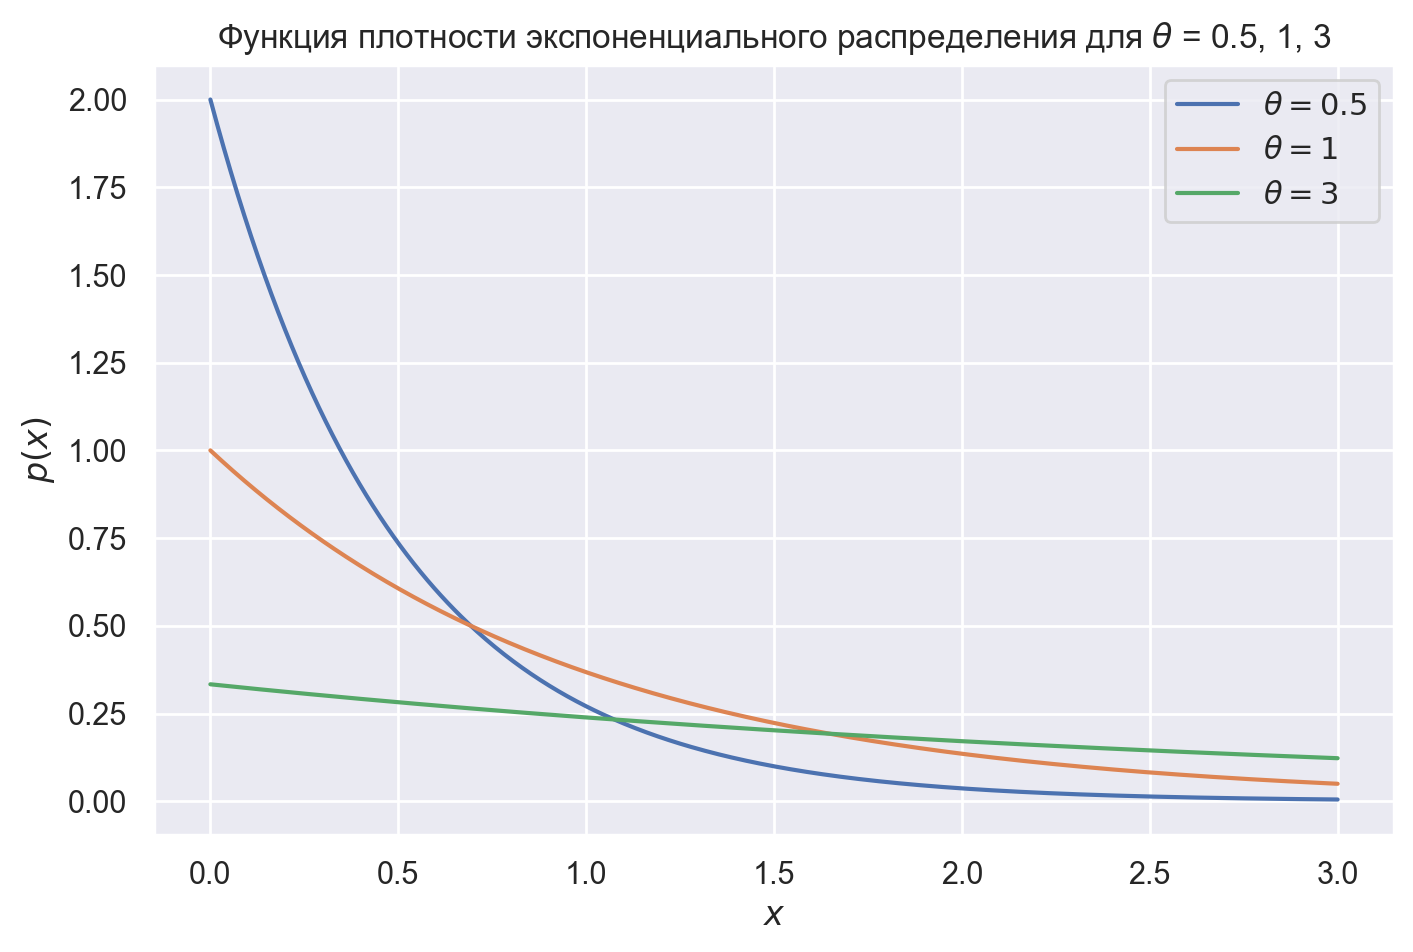

In [ ]:
# Построение функции плотности экспоненциального распределения
# для нескольких значений параметра theta

# Генерируем последовательность чисел в линейном пространстве с одинаковым размером шага для визуализации
x_values = np.linspace(0, 3, 500)

# Возьмем theta, т.е. мат. ожидание
theta_values = [0.5, 1, 3]

# Рисуем график для разных значений параметра
for theta_param in theta_values:
    y_values = 1 / theta_param * np.exp(- x_values / theta_param)
    plt.plot(x_values, y_values, label=f'$θ = {theta_param}$')

plt.title('Функция плотности экспоненциального распределения для $θ$ = 0.5, 1, 3')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.legend()
plt.show()

In [ ]:
# # Раскомментируйте строки ниже, если хотите взять lambda вместо theta (и подумайте, как изменится интерпретация)
# # Построение функции плотности экспоненциального распределения для нескольких значений параметра lambda

# # Генерируем последовательность чисел в линейном пространстве с одинаковым размером шага для визуализации
# x_values = np.linspace(0, 3, 500)

# # возьмем lambda
# lambda_values = [0.5, 1, 3]

# # Рисуем график
# for lambda_param in lambda_values:
#     y_values = lambda_param * np.exp(-lambda_param * x_values)
#     plt.plot(x_values, y_values, label=f'$λ = {lambda_param}$')

# plt.title('Функция плотности экспоненциального распределения для $λ = 0.5, 1, 3$')
# plt.xlabel('$x$')
# plt.ylabel('$p(x)$')
# plt.legend()
# plt.grid(True)
# plt.show()

Видим график, показывающий функцию плотности экспоненциального распределения для трех разных значений $\theta$: 0.5, 1 и 3 (как говорилось выше, распределение называется стандартным при $\theta = \lambda = 1$). При желании можно использовать $\lambda$ вместо $\theta$, для этого нужно раскомментировать соответствующие строки кода в ячейке выше.

Как видно, **при увеличении параметра** $\theta$ кривая выпрямляется (и наоборот при увеличении $\lambda$, что логично), а вероятность экспоненциально уменьшается по мере увеличения значения $x$.

Это иллюстрирует, как **параметр интенсивности** $\theta$ влияет на экспоненциальное распределение.
Так, его меньшее значение означает более высокую скорость наступления события, что приводит к более крутому снижению функции плотности вероятности. Это можно интерпретировать как более частое происхождение событий в более короткие временные промежутки.

---

### 4. Примеры решения задач <a name="par4"></a>

Попробуем решить задачу, приближенную к реальным данным.

Предположим, что **средний срок работы правительственной коалиции** в Нидерландах равен 2 годам. В ноябре 2023 г. в Нидерландах состоялись досрочные парламентские выборы, по итогам которых должна быть сформирована новая коалиция. Европейское аналитическое агентство обратилось к нам, чтобы мы помогли проанализировать вероятный срок работы новой коалиции.

Предполагая, что случайная величина $X$ – *продолжительность работы правительственной коалиции* – имеет экспоненциальное распределение, найдите:
1. Вероятность того, что продолжительность работы новой коалиции составит не более 2 лет.
2. Вероятность того, что продолжительность работы новой коалиции будет не меньше 1 года, но меньше 4 лет.
3. Значение функции надежности $G(X = 1)$ и проинтерпретируйте его.
4. Значение квантили уровня 0.75 для сл. в. $X$ – продолжительность работы правительственной коалиции.

1. **Вероятность того, что продолжительность работы новой коалиции составит не более 2 лет.**

В условии сказано, что средний срок работы правительственной коалиции в Нидерландах равен 2 годам $\Rightarrow \theta = 2$, а частота нашего события: $\dfrac{1}{2} = \lambda$

Чтобы найти вероятность того, что продолжительность работы новой коалиции составит не более 2 лет, нужно найти значение *функции распределения* (произвольного) от 2:

$$
P(X \leq 2) = F(2) = 1 - e^{- \frac{2}{2}} \approx 0.632
$$

Таким образом, вероятность того, что новая коалиция «доживет» хотя бы до половины своего среднего срока, составляет примерно 0.632.

2. **Вероятность того, что продолжительность работы новой коалиции будет не меньше 1 года, но меньше 4 лет.**

Для решения данного пункта нам необходимо найти следующую вероятность: $P(1 \leq X < 4)$. Сделаем это с помощью *разности функций распределения*:
$$
P(1 \leq X < 4) = F(4) - F(1) = 1 - e^{-\frac{4}{2}} - (1 - e^{-\frac{1}{2}}) =
e^{-0.5} - e^{-2} \approx 0.471
$$

3. **Значение функции надежности $G(X = 1)$ и проинтерпретируйте его**

*Функция надежности* означает вероятность того, что длительность превысит заданное время $x$. Следовательно $G(X = 1) = P(X \geq 1)$

Значит:
$$
G(X = 1) = P(X \geq 1) = e^{-\frac{1}{2}} = 0.607
$$

**Интерпретация**: вероятность того, что продолжительность работы новой коалиции превысит 1 год, составляет $0.607$

4. **Значение квантили уровня 0.75 для сл. в. $X$ – продолжительность работы правительственной коалиции**

Чтобы найти квантиль, нужно решить следующее уравнение:
$$
X_{p}: F(x) = p
$$

Следовательно:
$$
1 - e^{- \frac{x}{2}} = 0.75
$$
$$
e^{- \frac{x}{2}} = 0.25
$$
$$
\ln e^{- \frac{x}{2}} = \ln 0.25
$$
$$
- \frac{x}{2} \ln e = \ln 0.25
$$
$$
- \frac{x}{2} = \ln 0.25
$$
$$
x = - \ln 0.25 \cdot 2
$$
$$
x = 2.773
$$

Значит, время работы 75% правительственных коалиций **не** превышает $2.773$ года.

### 5. Пример в Python <a name="par5"></a>

Воспроизведем в **Python** решение задачи выше, найдя значения функции распределения, функции надежности и квантили для экспоненциального распределения.

Будем использовать для этого модуль `scipy.stats`:

In [ ]:
# Документация:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
from scipy.stats import expon

# Выставим параметр theta (мат. ожидание)
theta_param = 2

# Создадим эксп-е распределение с параметром theta
# По умолчанию создается стандартное эксп. распределение
dist = expon(scale=theta_param)

# Найдем значение функции распределения
cdf_1 = dist.cdf(2)  # F(2)
cdf_2 = dist.cdf(4) - dist.cdf(1)  # F(4) - F(1)

# Найдем значение функции надежности (Survival Function)
reliability = dist.sf(1)  # G(X = 1)

# Найдем сразу несколько квантилей (точнее квартилей)
quantiles = dist.ppf([0.25, 0.5, 0.75])

print('P(X <= 2) =', cdf_1)
print('P(1 <= X < 4) =', cdf_2)
print('G(X = 1) =', reliability)
print('X_0.25, X_0.5, X_0.75 =', quantiles)

P(X <= 2) = 0.6321205588285577
P(1 <= X < 4) = 0.4711953764760207
G(X = 1) = 0.6065306597126334
X_0.25, X_0.5, X_0.75 = [0.57536414 1.38629436 2.77258872]
